# Loading the Data from Statsbomb

One of the main benefits of working with kloppy is that it loads metadata with the event data. This metadata includes teams (name, ground and provider id) and players (name, jersey number, optional position and provider id). Using this metadata, it becomes very easy to create an analysis that is usable by humans, because it includes names instead of only numbers.



In [1]:
from kloppy import statsbomb

In [2]:
dataset = statsbomb.load_open_data(event_types=["pass", "shot"])

/Users/michaelkhanda/opt/anaconda3/lib/python3.9/site-packages/kloppy/_providers/statsbomb.py:66: UserWarning: 

You are about to use StatsBomb public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/statsbomb/open-data/blob/master/LICENSE.pdf

  warnings.warn(


In [3]:
metadata = dataset.metadata
home_team, away_team = metadata.teams

In [4]:
home_team, away_team = dataset.metadata.teams
print(f"{home_team} - {away_team}")


Barcelona - Deportivo Alavés


In [5]:
print(f"{home_team.ground} - {home_team}")
print(f"{away_team.ground} - {away_team}")

home - Barcelona
away - Deportivo Alavés


In [6]:
# get provider id for teams
f"statsbomb team id: {home_team.team_id} - {away_team.team_id}"

'statsbomb team id: 217 - 206'

In [7]:
[f"{player} ({player.jersey_no})" for player in home_team.players]

['Malcom Filipe Silva de Oliveira (14)',
 'Philippe Coutinho Correia (7)',
 'Sergio Busquets i Burgos (5)',
 'Jordi Alba Ramos (18)',
 'Gerard Piqué Bernabéu (3)',
 'Luis Alberto Suárez Díaz (9)',
 'Ivan Rakitić (4)',
 'Ousmane Dembélé (11)',
 'Samuel Yves Umtiti (23)',
 'Lionel Andrés Messi Cuccittini (10)',
 'Nélson Cabral Semedo (2)',
 'Sergi Roberto Carnicer (20)',
 'Clément Lenglet (15)',
 'Rafael Alcântara do Nascimento (12)',
 'Arturo Erasmo Vidal Pardo (22)',
 'Jasper Cillessen (13)',
 'Arthur Henrique Ramos de Oliveira Melo (8)',
 'Marc-André ter Stegen (1)']

In [8]:
for player in home_team.players:
    print(f"Player: {player} - {player.player_id}")

Player: Malcom Filipe Silva de Oliveira - 3109
Player: Philippe Coutinho Correia - 3501
Player: Sergio Busquets i Burgos - 5203
Player: Jordi Alba Ramos - 5211
Player: Gerard Piqué Bernabéu - 5213
Player: Luis Alberto Suárez Díaz - 5246
Player: Ivan Rakitić - 5470
Player: Ousmane Dembélé - 5477
Player: Samuel Yves Umtiti - 5492
Player: Lionel Andrés Messi Cuccittini - 5503
Player: Nélson Cabral Semedo - 6374
Player: Sergi Roberto Carnicer - 6379
Player: Clément Lenglet - 6826
Player: Rafael Alcântara do Nascimento - 6998
Player: Arturo Erasmo Vidal Pardo - 8206
Player: Jasper Cillessen - 8652
Player: Arthur Henrique Ramos de Oliveira Melo - 11392
Player: Marc-André ter Stegen - 20055


In [9]:
suarez = home_team.get_player_by_id(5246)
print(f"Name:{suarez.name}")
print(f"Jersey number: {suarez.jersey_no}")

Name:Luis Alberto Suárez Díaz
Jersey number: 9


In [10]:
print(f"Data in terms of passes and shots: {len(dataset.events)}")

Data in terms of passes and shots: 1191


In [11]:
# get player from first event
player = dataset.events[9].player
print(player)
print(player.team)
print(f"Teams are comparable? {player.team == away_team}")

Nélson Cabral Semedo
Barcelona
Teams are comparable? False


In [12]:
from collections import defaultdict

passes_per_player = defaultdict(list)
for event in dataset.events:
    if event.event_name == "pass":
        passes_per_player[event.player].append(event)
        
for player, passes in passes_per_player.items():
    print(f"{player} has {len(passes)} passes")

Jonathan Rodríguez Menéndez has 11 passes
Guillermo Alfonso Maripán Loaysa has 16 passes
Sergio Busquets i Burgos has 83 passes
Ivan Rakitić has 138 passes
Ousmane Dembélé has 67 passes
Jordi Alba Ramos has 128 passes
Víctor Laguardia Cisneros has 11 passes
Marc-André ter Stegen has 27 passes
Gerard Piqué Bernabéu has 81 passes
Nélson Cabral Semedo has 32 passes
Sergi Roberto Carnicer has 89 passes
Samuel Yves Umtiti has 65 passes
Lionel Andrés Messi Cuccittini has 91 passes
Rubén Duarte Sánchez has 25 passes
Ibai Gómez Pérez has 34 passes
Mubarak Wakaso has 22 passes
Fernando Pacheco Flores has 26 passes
Manuel Alejandro García Sánchez has 21 passes
Rubén Sobrino Pozuelo has 19 passes
Luis Alberto Suárez Díaz has 39 passes
Martín Aguirregabiria Padilla has 20 passes
Daniel Alejandro Torres Rojas has 16 passes
Philippe Coutinho Correia has 52 passes
Jorge Franco Alviz has 12 passes
Adrián Marín Gómez has 7 passes
Borja González Tomás has 6 passes
Arthur Henrique Ramos de Oliveira Melo 

In [13]:
suarez_passes_df = (
    dataset
    .filter(lambda event: event.player == suarez)
    .to_df(additional_columns={
        "player_name": lambda event: str(event.player)
    })
)

In [14]:
# Assuming you have already defined the suarez_passes_df DataFrame
print(suarez_passes_df)

                                   additional_columns
0   {'player_name': <function <lambda> at 0x7fc841...
1   {'player_name': <function <lambda> at 0x7fc841...
2   {'player_name': <function <lambda> at 0x7fc841...
3   {'player_name': <function <lambda> at 0x7fc841...
4   {'player_name': <function <lambda> at 0x7fc841...
5   {'player_name': <function <lambda> at 0x7fc841...
6   {'player_name': <function <lambda> at 0x7fc841...
7   {'player_name': <function <lambda> at 0x7fc841...
8   {'player_name': <function <lambda> at 0x7fc841...
9   {'player_name': <function <lambda> at 0x7fc841...
10  {'player_name': <function <lambda> at 0x7fc841...
11  {'player_name': <function <lambda> at 0x7fc841...
12  {'player_name': <function <lambda> at 0x7fc841...
13  {'player_name': <function <lambda> at 0x7fc841...
14  {'player_name': <function <lambda> at 0x7fc841...
15  {'player_name': <function <lambda> at 0x7fc841...
16  {'player_name': <function <lambda> at 0x7fc841...
17  {'player_name': <functio

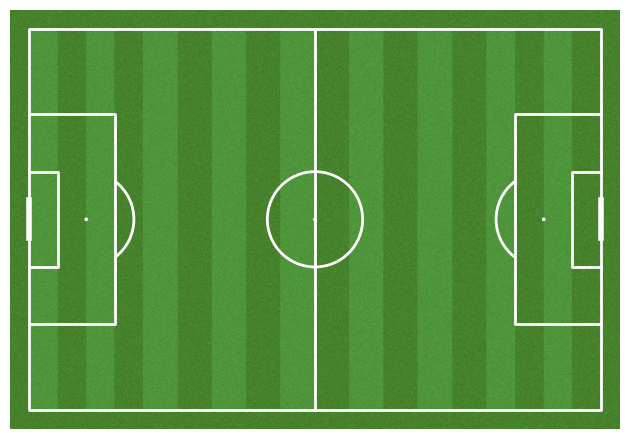

In [15]:
from mplsoccer.pitch import Pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw()